# BUILDING THE TRAINED MODEL

DATA PREPROCESSING

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('../dataset/upi_fraud_dataset.csv', index_col = 0)

In [3]:
dataset.head()

,trans_hour,trans_day,trans_month,trans_year,category,upi_number,age,trans_amount,state,zip,fraud_risk
0,0,1,1,2022,12,9957000001,54,66.21,22,49879,0
1,1,1,1,2022,3,9957000002,15,55.81,14,62668,0
2,3,1,1,2022,8,9957000003,60,8.68,4,96037,0
3,6,1,1,2022,4,9957000004,44,89.52,40,29911,0
4,6,1,1,2022,0,9957000005,72,1.90,38,16421,0


In [4]:
import numpy as np

In [5]:
x = dataset.iloc[ : , : 10].values
y = dataset.iloc[ : , 10].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 0)

In [8]:
x_train.shape

(2266, 10)

In [9]:
x_test.shape

(400, 10)

In [10]:
fraud = np.count_nonzero(y_train == 1)
valid = np.count_nonzero(y_train == 0)

In [11]:
print('Fraud cases in training data =', fraud)
print('Valid cases in training data =', valid)

Fraud cases in training data = 1348
Valid cases in training data = 918


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
x_train[ : 5]

array([[ 1.11287494,  0.23492331, -0.89608107,  0.        ,  0.0602433 ,
         0.68096147,  0.83994401, -0.84340161, -0.45791225, -1.64639185],
       [-1.1894848 , -0.92886509,  0.66178275,  0.        , -1.24483613,
        -0.3824002 , -0.27301162, -0.83469894,  1.03866827, -0.4058421 ],
       [ 1.11287494, -1.02584746,  2.53121934,  0.        ,  0.32125918,
        -0.38240085,  1.63491233,  1.40609705, -0.31538077,  0.32896382],
       [-1.1894848 ,  0.91379987, -0.89608107,  0.        , -1.24483613,
        -1.11969157, -0.3790074 , -0.72010938, -0.24411503,  0.5966091 ],
       [ 1.11287494,  0.42888804, -0.89608107,  0.        , -1.76686789,
        -1.11969169, -0.8029905 ,  0.14610555,  1.18119975,  1.37176053]])

In [15]:
x_test[ : 5]

array([[ 0.99775696, -1.02584746,  0.66178275,  0.        , -1.50585201,
        -0.38240103, -0.8029905 , -0.55231661, -0.24411503,  0.60587057],
       [-1.30460278,  1.6896588 , -0.89608107,  0.        , -0.72280436,
        -0.93972315,  0.09797359, -0.10066076, -1.66942982,  1.78976412],
       [-1.07436681,  0.33190567, -0.27293554,  0.        , -1.24483613,
        -0.38240071, -0.96198416, -0.63173177,  0.46854236, -1.33247671],
       [ 0.53728501, -1.21981219,  0.66178275,  0.        ,  1.10430683,
         1.8381786 ,  0.94593979,  1.36440214, -0.24411503,  0.62521842],
       [ 0.07681306, -1.02584746, -0.27293554,  0.        , -0.20077259,
        -0.38240113, -0.22001374, -0.63409578, -0.67170947,  0.8568677 ]])

LOGISTIC REGRESSION (LR)

In [16]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred = LR_model.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
acc_lr = accuracy_score(y_test, y_pred)

In [20]:
print(acc_lr)

0.8025


K-NEAREST NEIGHBORS (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_pred = KNN_model.predict(x_test)

In [23]:
acc_knn = accuracy_score(y_test, y_pred)

In [24]:
print(acc_knn)

0.83


SUPPORT VECTOR MACHINE (SVM)

In [25]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
y_pred = SVM_model.predict(x_test)

In [27]:
acc_svm = accuracy_score(y_test, y_pred)

In [28]:
print(acc_svm)

0.815


NAIVE BAYES (NB)

In [29]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [30]:
y_pred = NB_model.predict(x_test)

In [31]:
acc_nb = accuracy_score(y_test, y_pred)

In [32]:
print(acc_nb)

0.8125


DECISION TREE (DT)

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
y_pred = DT_model.predict(x_test)

In [35]:
acc_dt = accuracy_score(y_test, y_pred)

In [36]:
print(acc_dt)

0.9475


RANDOM FOREST (RF)

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
y_pred = RF_model.predict(x_test)

In [39]:
acc_rf = accuracy_score(y_test, y_pred)

In [40]:
print(acc_rf)

0.955


CONVOLUTIONAL NEURAL NETWORK (CNN)

In [41]:
import tensorflow as tf

C:\Users\TUSHAR HIRAWAT\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\TUSHAR HIRAWAT\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\TUSHAR HIRAWAT\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [42]:
CNN_model = tf.keras.models.Sequential()

In [43]:
CNN_model.add(tf.keras.layers.Dense(64, input_dim = 10, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
CNN_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [44]:
CNN_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [45]:
CNN_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
2266/2266 [==============================] - 1s 308us/sample - loss: 0.5131 - acc: 0.7410
Epoch 2/200
2266/2266 [==============================] - 0s 154us/sample - loss: 0.4013 - acc: 0.8129
Epoch 3/200
2266/2266 [==============================] - 0s 148us/sample - loss: 0.3666 - acc: 0.8327
Epoch 4/200
2266/2266 [==============================] - 0s 96us/sample - loss: 0.3413 - acc: 0.8380
Epoch 5/200
2266/2266 [==============================] - 0s 135us/sample - loss: 0.3274 - acc: 0.8539
Epoch 6/200
2266/2266 [==============================] - 0s 113us/sample - loss: 0.3200 - acc: 0.8663
Epoch 7/200
2266/2266 [==============================] - 0s 105us/sample - loss: 0.3051 - acc: 0.8663
Epoch 8/200
2266/2266 [==============================] - 0s 118us/sample - loss: 0.3034 - acc: 0.8619
Epoch 9/200
2266/2266 [==============================] - 0s 103us/sample - loss: 0.2981 - acc: 0.8689
Epoch 10/200
2266/2266 [==============================] - 0s 100us/sample - loss: 0

2266/2266 [==============================] - 0s 125us/sample - loss: 0.1306 - acc: 0.9506
Epoch 81/200
2266/2266 [==============================] - 0s 118us/sample - loss: 0.1269 - acc: 0.9523
Epoch 82/200
2266/2266 [==============================] - 0s 118us/sample - loss: 0.1244 - acc: 0.9541
Epoch 83/200
2266/2266 [==============================] - 0s 97us/sample - loss: 0.1213 - acc: 0.9554
Epoch 84/200
2266/2266 [==============================] - 0s 114us/sample - loss: 0.1203 - acc: 0.9581
Epoch 85/200
2266/2266 [==============================] - 0s 100us/sample - loss: 0.1193 - acc: 0.9554
Epoch 86/200
2266/2266 [==============================] - 0s 111us/sample - loss: 0.1184 - acc: 0.9528
Epoch 87/200
2266/2266 [==============================] - 0s 102us/sample - loss: 0.1192 - acc: 0.9550
Epoch 88/200
2266/2266 [==============================] - 0s 95us/sample - loss: 0.1149 - acc: 0.9598
Epoch 89/200
2266/2266 [==============================] - 0s 115us/sample - loss: 0.1187

2266/2266 [==============================] - 0s 69us/sample - loss: 0.0375 - acc: 0.9881
Epoch 160/200
2266/2266 [==============================] - 0s 83us/sample - loss: 0.0304 - acc: 0.9929
Epoch 161/200
2266/2266 [==============================] - 0s 116us/sample - loss: 0.0345 - acc: 0.9916
Epoch 162/200
2266/2266 [==============================] - 0s 108us/sample - loss: 0.0266 - acc: 0.9951
Epoch 163/200
2266/2266 [==============================] - 0s 122us/sample - loss: 0.0267 - acc: 0.9956
Epoch 164/200
2266/2266 [==============================] - 0s 110us/sample - loss: 0.0282 - acc: 0.9943
Epoch 165/200
2266/2266 [==============================] - 0s 128us/sample - loss: 0.0304 - acc: 0.9934
Epoch 166/200
2266/2266 [==============================] - 0s 111us/sample - loss: 0.0319 - acc: 0.9925
Epoch 167/200
2266/2266 [==============================] - 0s 129us/sample - loss: 0.0250 - acc: 0.9938
Epoch 168/200
2266/2266 [==============================] - 0s 105us/sample - los

In [46]:
loss, acc_cnn = CNN_model.evaluate(x_train, y_train, verbose = 0)

In [47]:
print(acc_cnn)

0.9995587


In [48]:
y_pred = CNN_model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1

ACCURACY COMPARISON OF ALL THE MODELS

In [49]:
scores = [acc_lr * 100,
          acc_knn * 100,
          acc_svm * 100,
          acc_nb * 100,
          acc_dt * 100,
          acc_rf * 100,
          acc_cnn * 100]

In [50]:
names = ["Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
        "Naive Bayes",
        "Decision Tree",
        "Random Forest",
        "Convolutional Neural Network"]

In [51]:
df = pd.DataFrame()
df['Algorithm Name'] = names
df['Accuracy Score (%)'] = scores
df = df.sort_values('Accuracy Score (%)', ascending = False)

In [52]:
df

,Algorithm Name,Accuracy Score (%)
6,Convolutional Neural Network,99.955869
5,Random Forest,95.500000
4,Decision Tree,94.750000
1,K-Nearest Neighbors,83.000000
2,Support Vector Machine,81.500000
3,Naive Bayes,81.250000
0,Logistic Regression,80.250000


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

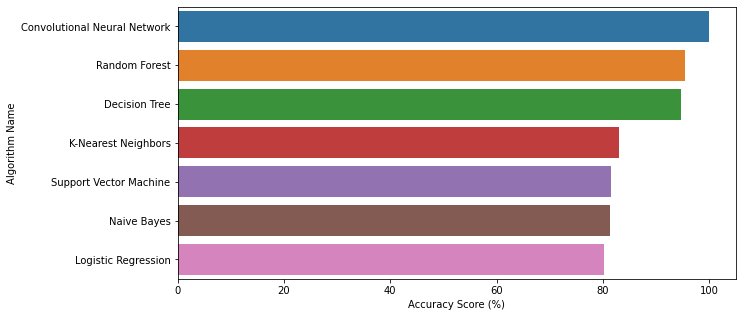

In [54]:
fig = plt.subplots(figsize = (10, 5))
ax = sns.barplot(x = "Accuracy Score (%)", y = "Algorithm Name", data = df)

SAVING THE BEST TRAINED MODEL

In [55]:
import os.path

In [57]:
if os.path.isfile('../model/project_model1.h5') is False:
    CNN_model.save('../model/project_model1.h5')